# Restaurant Tips: Which variables — payer’s gender, smoking status, day of the week, time of day, and party size — are associated with the tip percentage?

Group name: 2 / Student names: Rafa Africa, Ben Ni, Yingming Sha, Michael Tham

Course: STAT 301 Section 201 / Date: 04/08/2025 

## (1) Introduction

Tipping is a widespread social norm in service industries, particularly in restaurants, where it can contribute significantly to employee income. However, tipping behavior is not entirely uniform—numerous studies have found that factors such as customer demographics, situational context, and group dynamics can all influence how much people tip (Jewell, 2008). Understanding what drives tipping behavior is valuable not only for economic modeling, but also for helping restaurant managers and servers improve their service strategies and expectations.

This study explores whether variables such as payer’s gender, smoking status, day of the week, time of day, and party size are associated with the tip percentage left in a restaurant setting. Research has shown that, for instance, tipping tends to decrease as party size increases, likely due to a diffusion of responsibility or shared norms within larger groups (Haugom & Thrane, 2022). Similarly, differences in tipping patterns have been observed based on temporal variables like weekday vs. weekend or lunch vs. dinner (Jewell, 2008).

Building upon these insights, this study aims to investigate the relationships between specific variables—payer’s gender, smoking status, day of the week, time of day, and dining party size—and tip percentage in a restaurant setting.

This study contributes to the existing body of knowledge on tipping behavior by focusing on specific variables that have been identified in prior research as potential influencers of tipping practices. By examining these factors collectively, the study aims to provide a comprehensive understanding of their individual and combined effects on tip percentages.

### Research Question
**Our Research Question**: Which variables, payer's gender, smoking status, day of the week, time of day, and dining party size, are associated with the tip percentage in a restaurant?

**Response variable** - tip percentage (total bill divided by the tip amount left by customer);

**Explanatory variables** - sex (gender), smoker (Yes or No), day (day of the week), time (Lunch or Dinner), and party size.

**Explanation**: This question is focused on **inference**, as it aims to understand the relationships between the sex, smoker, day, time, party size and the tip percentage. The goal is to identify which factors are significant in determining the tip percentage, rather than predicting individual tip percentage for future transactions.

## (2) Methods and Results

In [1]:
# First we load the library
library(tidyverse)
library(gridExtra) # for visualization
library(MASS) # for selection
library(car) # for vif
library(httr) # load data
library(rsample) # for train-test split

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




### a) Data 

#### Data Description 

The "Restaurant Tips Dataset" details tipping behavior in a restaurant setting. The dataset was collected over an long period of time and includes a variety of factors that may influence the amount a customer tips. Each entry represents a unique transaction, recording details such as the bill amount, tip given, gender of the payer, smoking preference, day of the week, time of day, and number of diners. This data contains 244 observations and 7 variables. The continuous variables are total_bill, tip, and size, while the categorical variables are sex, smoker, day, and time. 

The dataset used in this study was collected through observational means, meaning the data reflects real-world restaurant transactions without any experimental manipulation. As such, while we can investigate associations between variables and tip percentage, causal conclusions cannot be drawn.

**Description of each variable:**

| id | Key       | Description|
|----|-----------|-----------------------------------------------------------|
|1   |total_bill | Total bill amount in dollars                               |
|2   |tip        | Tip amount in dollars                                      |
|3   |sex        | Gender of the person paying the bill (Male/Female)         |
|4   |smoker     | Whether the person is a smoker (Yes/No)                    |
|5   |day        | Day of the transaction (Thur/Fri/Sat/Sun)                  |
|6   |time       | Time of day when the transaction took place (Lunch/Dinner) |
|7   |size       | Size of the dining party (number of people)                |

**Source and information**

According to the owner of this dataset, Saurabh Badole, the data in this dataset was collected from a popular restaurant over a specified period (Badole, 2024). I retreived this dataset through Badole publishing it on Kaggle.

**Justification**: For this research question, total_bill and tip will be dropped since the tip percentage is calculated based on these two covariates. If we include these two covariates, there will be a multicollinearity issue.

In [2]:
# Read the data into R
invisible(
GET(
  url = "https://www.kaggle.com/api/v1/datasets/download/saurabhbadole/restaurant-tips-dataset",
  authenticate("yingmingsha", "c52dacb47dd5f58ebfe40f4eb435b1b4", type = "basic"),
  write_disk("restaurant-tips-dataset.zip", overwrite = TRUE)
    )
)

unzip("restaurant-tips-dataset.zip")

tips <- read.csv("tips.csv")

head(tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


### b) Exploratory Data Analysis (EDA)

In [3]:
# Main developer: Yingming 

# Check missing values and duplicated rows
summary_table <- tibble(
  Metric = c("Total Missing Values", "Total Duplicate Rows"),
  Count = c(sum(is.na(tips)), sum(duplicated(tips))) 
)
summary_table

Metric,Count
<chr>,<int>
Total Missing Values,0
Total Duplicate Rows,1


In [4]:
# Main developer: Yingming 

# Clean and wrangle the data into a tidy format
tip_clean <- tips %>%
    distinct() %>% # remove duplicated row
    mutate(tip_per = tip / total_bill * 100) # calculate the bill percentage 

tip_final <- tip_clean %>%
    dplyr::select(-total_bill, -tip) # drop 'total_bill' and 'tip' columns (justification given above)

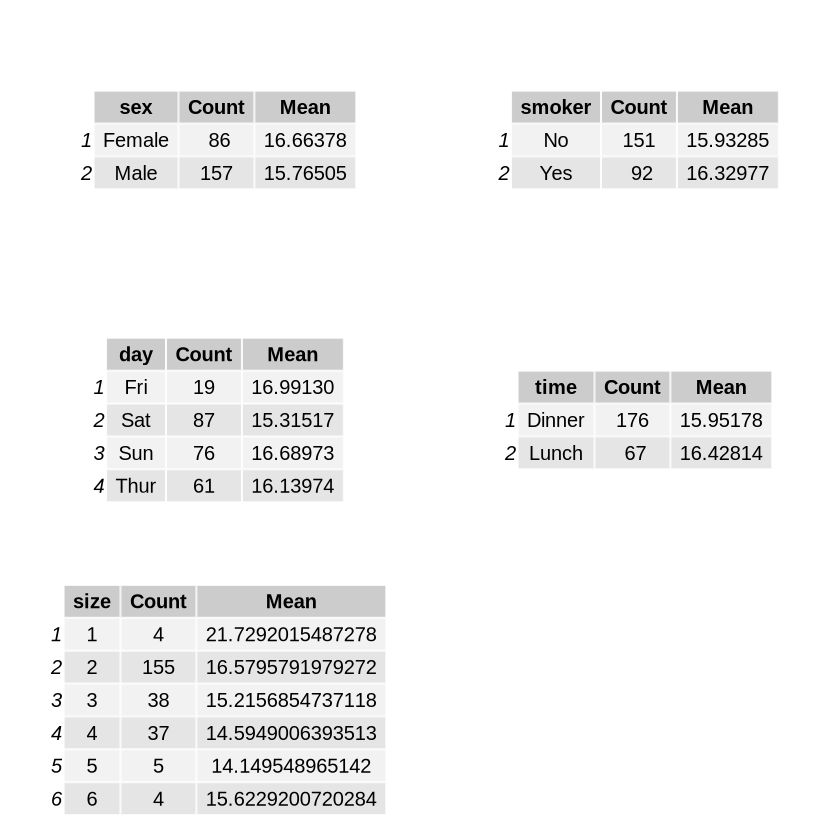

In [5]:
# Main developer: Yingming

# Summary tables that are relevant to the analysis
summary_table_sex <- tip_final %>%
  group_by(sex) %>%
  summarize(
      Count = n(),                         # Total count
      Mean = mean(tip_per, na.rm = TRUE)   # Mean
  )

summary_table_smo <- tip_final %>%
  group_by(smoker) %>%
  summarize(
    Count = n(),                                  
    Mean = mean(tip_per, na.rm = TRUE) 
  )

summary_table_day <- tip_final %>%
  group_by(day) %>%
  summarize(
    Count = n(),                               
    Mean = mean(tip_per, na.rm = TRUE)
  )

summary_table_time <- tip_final %>%
  group_by(time) %>%
  summarize(
    Count = n(),                                
    Mean = mean(tip_per, na.rm = TRUE)
  )

summary_table_size <- tip_final %>%
  group_by(size) %>%
  summarize(
      Count = n(),      
      Mean = mean(tip_per, na.rm = TRUE)   
  )

grid.arrange(
  tableGrob(summary_table_sex), tableGrob(summary_table_smo),
  tableGrob(summary_table_day), tableGrob(summary_table_time), tableGrob(summary_table_size),
  ncol = 2
)

**Interpretation of Summary Tables:**

Overall, the data has no missing values, and there is one duplicated row. Since the dataset contains more categorical variables, the summary tables above provide a basic overview of each covariate in relation to the response variable. From the tables, we can see that there is little difference in the average tip percentage across sex, smoker status, day, and time. However, for party size, there appears to be a potential decrease in the average tip percentage as the party size increases.

### Visualization plots

`geom_smooth()` using formula = 'y ~ x'


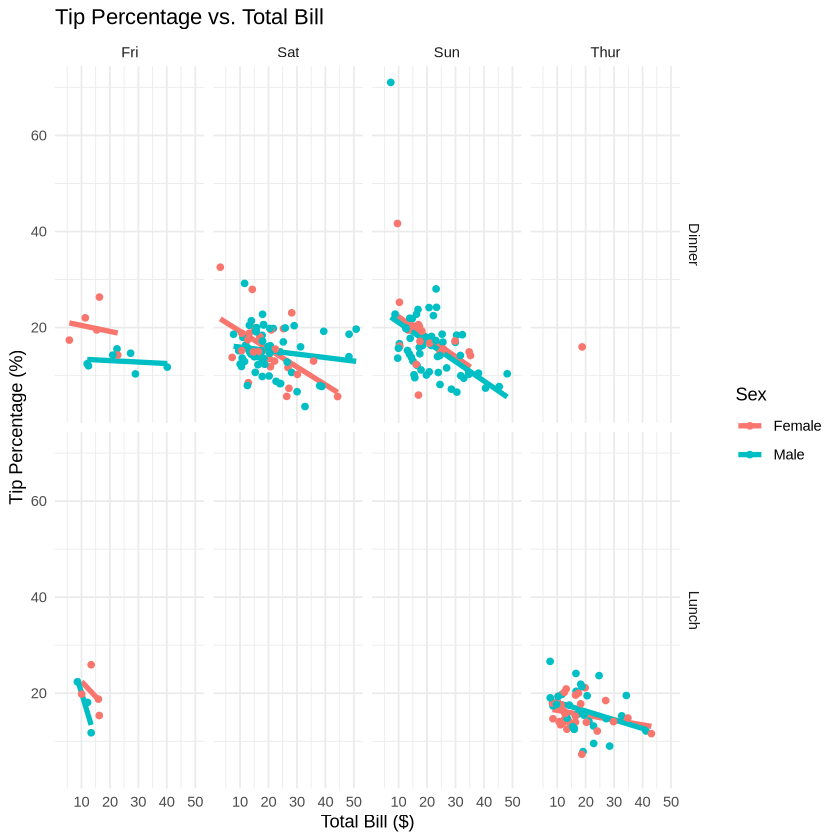

In [6]:
# Main developer: Rafa
# Scatterplot showing the tip percentages against the total bill
tips_plot <- tip_clean %>%
  ggplot(aes(x = total_bill, y = tip_per, color = sex)) +  
  geom_smooth(method = "lm", se = FALSE, linewidth = 1.5) +  
  geom_point() +
  facet_grid(time ~ day) +
  ggtitle("Tip Percentage vs. Total Bill") +
  xlab("Total Bill ($)") +
  ylab("Tip Percentage (%)") +
  labs(color = "Sex") +
  theme_minimal()

tips_plot

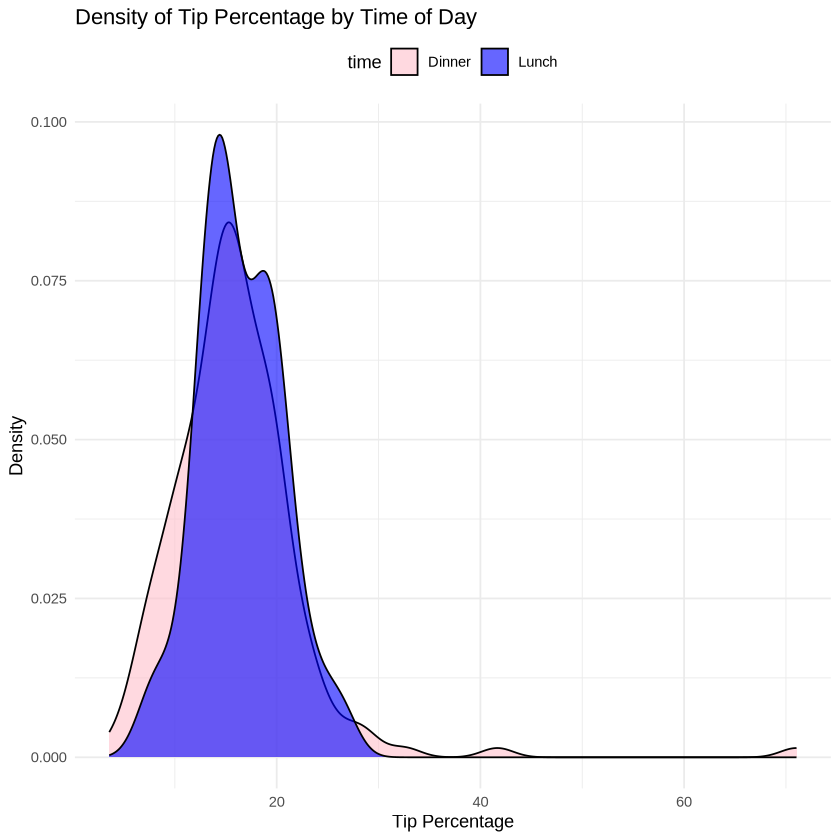

In [7]:
#Main Developer: Rafa
#Density plot to show what the most frequent tipping percentage based on the bill and seperated by time 
density_plot <- tip_final %>%
  ggplot(aes(x = tip_per, fill = time)) + 
  geom_density(alpha = 0.6) +  
  scale_fill_manual(values = c("pink", "blue")) +
  ggtitle("Density of Tip Percentage by Time of Day") +
  xlab("Tip Percentage") +
  ylab("Density") +
  theme_minimal() +
  theme(legend.position = "top")

density_plot



These visualizations are relevant as it gives us further insight into how the variables affect the tipping percentage. The scatterplot provides a general overview at exploring the different variables against the tip percentage and total bill. This gives us insight into what days are the most popular, what time has the most customers, and whether sex plays a role in the tip percentage. Observing the other factors also shows us where the data may be incomplete such as Thursday dinner only having one observation or Saturday and Sunday lunches having none. These insights help us to understand the data and create better interpretations by being cautious when generalizaing the findings presented in the data and the analysis.

The density plot is a more focused and clear visualization to better understand tipping percentage. Here it narrows the tipping percentage into two different density plots seperated by time. This is easier to interpret and it shows what amount results in the highest percentage. This plot shows its findings of being that there is a higher likelihood that there would be a larger tip percent during lunch time with it being slightly above 8% and the largest for dinner being below 7.5% with the average total bill for this being between $10-20. 

These two visualizations are important as they give a broader insight into how certain varibales affect tipping percentage. The first visualization explores the complex relationships between the variables and the second visualization narrows down the varibales and instead observes the frequency, highest tips made with total bill and time. These visualization show different perspectives to this data and helps in understanding potential factors that may affect the tipping percentage of a customer.

### c) Methods: Plan

After our group interview, we decided that 2 of us would try Poisson regression and 2 of us would try Multiple Linear Regression and then compare the results to ultimately decide how we will select a final model for the final group project.

**Proposed Method:** Multiple Linear Regression & Poisson Model

**Why is MLR appropriate?**

This method is suitable because it allows us to model the relationship between a continuous response variable (tip percentage) and multiple predictor variables. This dataset consists of both numerical and categorical variables and using MLR allows us to interpret how these variables affect the tipping percentage. The coefficients of the regression model will give us clear insights into how each predictor influences the tip percentage and this makes it easy to interpret.

**Why is Poisson Regression Appropriate?**

- Tip percentage is a rate-like variable – Poisson regression models count-based data, but it is also commonly used for rate data, such as percentages. Since tip percentage is a proportion of the total bill, it behaves similarly to a rate.
- Handles non-negative dependent variables – Tip percentage is always ≥ 0, making Poisson regression a good fit since it prevents predicting negative values.
- Can model relationships between categorical and continuous variables – Since my explanatory variables include categorical variables (sex, day, time) and a continuous variable (party size), Poisson regression allows me to evaluate their effects on tip percentage.
- Log-link function ensures a multiplicative effect – Instead of assuming a linear relationship (like in multiple linear regression), Poisson regression assumes that predictor variables have a multiplicative effect on the expected outcome (tip percentage). This makes it more flexible in modeling tipping behavior.

**Which assumptions are required, if any, apply to MLR?**
1. Linearity: The relationship between the predictors and the response variable is assumed to be linear. 
2. Independence: Observations are assumed to be independent of each other, meaning that the tip percentage of one transaction doesn’t affect others.
3. Homoscedasticity: The variance of the residuals (errors) is assumed to be constant across all levels of the predictors.
4. Normality of Residuals: The residuals are assumed to follow a normal distribution.


**Which assumptions are required, if any, apply to Poisson Regression?**
1. Non-negative Response Variable – The outcome variable (tip_percentage) must be ≥ 0.
2. Mean-Variance Equality – Poisson regression assumes that the mean and variance of the response variable are equal.
3. Log-Linear Relationship – The model assumes that the log of the expected tip percentage is a linear function of the predictor variables. If the relationship is not log-linear, the model might not fit well.
4. Independence of Observations – Each observation (i.e., each restaurant bill) is assumed to be independent. If certain groups (e.g., repeat customers or tables from the same restaurant) are correlated, the assumption of independence may be violated.

**What are the potential limitations or weaknesses of MLR?**
1. Linearity Assumption: If the relationship between the predictors and the tip percentage is non-linear, the model may not perform well. 
2. Multicollinearity: If any of the predictors are highly correlated with each other (e.g., **day** and **time**), it could lead to multicollinearity, where it becomes difficult to isolate the effect of individual predictors. However, this can be checked using vif().

**What are the potential limitations or weaknesses of Poisson Regression?**
1. Overdispersion: If the variance of the data is significantly greater than the mean, Poisson regression may not be the best fit.
2. Assumes a Log-Linear Relationship: If the relationship between tip percentage and predictors is not exponential, Poisson regression may not model it well.
3. Interpretation Can Be Less Intuitive: Unlike linear regression, where coefficients represent direct changes, Poisson regression coefficients represent multiplicative effects (i.e., changes in the log scale), which may require additional steps to interpret.

**Variable Selection Method (for MLR):** Stepwise Selection

We will be using stepwise selection to refine our model and identify the most significant predictors of tip percentage. Stepwise selection is useful when there is some uncertainty about which predictors are most relevant, as it allows for both adding and removing variables based on statistical criteria. 

We will apply stepwise selection using AIC, which balances model fit and complexity. The response variable is tip percentage, and the predictors initially considered were sex, smoker status, day, time, and size.

**Variable Selection Method (for Poisson):** n/a

Regarding using LASSO and other advanced regularization techniques, such as ridge regression, we went against using these as they are primarily used in predictive modeling to handle high-dimensional data, reduce overfitting, or perform variable selection when there are many predictors. In this analysis, however, the focus is on inference rather than prediction - the goal is to understand which variables — payer’s gender, smoking status, day of the week, time of day, and party size — are associated with the tip percentage, not to build a model that predicts tipping behavior with the highest accuracy. Additionally, the dataset includes only a small number of explanatory variables, making regularization unnecessary and potentially counterproductive, as it could obscure the interpretability of individual coefficients. For these reasons, we chose to stick with a standard Poisson regression model, which is more appropriate for the inferential aims of the project.

### Computational Code (MLR)

In [8]:
# Main developer: Yingming 

tip_full_model <- lm(tip_per ~ ., data = tip_final)

# Check multicollinearity in the full Model
vif(tip_full_model) 

summary(tip_full_model)

,GVIF,Df,GVIF^(1/(2*Df))
sex,1.057406,1,1.028303
smoker,1.133435,1,1.064629
day,10.460180,3,1.478847
time,8.997935,1,2.999656
size,1.061287,1,1.030188



Call:
lm(formula = tip_per ~ ., data = tip_final)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.172  -3.156  -0.401   2.872  53.445 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.3120     2.0791   8.808 2.86e-16 ***
sexMale      -0.8724     0.8383  -1.041   0.2991    
smokerYes     0.3911     0.8557   0.457   0.6481    
daySat       -0.1646     1.8381  -0.090   0.9287    
daySun        1.6886     1.9071   0.885   0.3768    
dayThur      -1.7726     2.3282  -0.761   0.4472    
timeLunch     2.3383     2.6168   0.894   0.3725    
size         -0.9651     0.4226  -2.284   0.0233 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.077 on 235 degrees of freedom
Multiple R-squared:  0.04239,	Adjusted R-squared:  0.01387 
F-statistic: 1.486 on 7 and 235 DF,  p-value: 0.1729


**Initial Analysis:**

Based on the vif(), `day` and `time` may exhibit multicollinearity, with `day` being more serious due to its GVIF exceeding 10. From the summary(), we observe the following:

- sexMale: Coefficient = -0.87 (p = 0.299), suggesting that men tip 0.87% less than women. However, this result is not statistically significant.
- smokerYes: Coefficient = 0.39 (p = 0.648), indicating that smokers tip 0.39% more than non-smokers. But this effect is also not statistically significant.
- day (reference: Friday): There are no statistically significant differences in tipping between days (Saturday, Sunday, Thursday), based on the p-values.
- timeLunch: Coefficient = 2.34 (p = 0.373), suggesting that lunch customers tip 2.34% more than dinner customers, but this effect is not significant.
- size: Coefficient = -0.97 (p = 0.023), meaning larger parties tip 0.97% less. This result is statistically significant.

Fitting the full model provides some insight into how the predictor variables relate to the response variable. However, to improve the model, we will now apply a variable selection method to identify a more optimal model.

In [9]:
# Main developer: Yingming 

# Split data into training and testing sets
set.seed(123)  
tip_split <- initial_split(tip_final, prop = 0.7, strata = tip_per)  # 70% train, 30% test
tip_train <- training(tip_split)
tip_test <- testing(tip_split)

# Fit model using training data
# Full model with all covariates
tip_full_train <- lm(tip_per ~ ., data = tip_train)

# Perform stepwise selection
tip_backward <- stepAIC(tip_full_train, direction = "backward", k = 2)

Start:  AIC=637.9
tip_per ~ sex + smoker + day + time + size

         Df Sum of Sq    RSS    AIC
- time    1     2.101 6809.3 635.95
- smoker  1    25.849 6833.0 636.53
- sex     1    65.323 6872.5 637.50
- day     3   236.615 7043.8 637.64
- size    1    71.806 6879.0 637.66
<none>                6807.2 637.90

Step:  AIC=635.95
tip_per ~ sex + smoker + day + size

         Df Sum of Sq    RSS    AIC
- smoker  1    27.432 6836.7 634.62
- sex     1    64.136 6873.4 635.52
- size    1    72.763 6882.1 635.73
<none>                6809.3 635.95
- day     3   254.529 7063.8 636.11

Step:  AIC=634.62
tip_per ~ sex + day + size

       Df Sum of Sq    RSS    AIC
- sex   1    62.008 6898.7 634.14
- day   3   240.339 7077.1 634.43
<none>              6836.7 634.62
- size  1    86.866 6923.6 634.75

Step:  AIC=634.14
tip_per ~ day + size

       Df Sum of Sq    RSS    AIC
- day   3    221.94 7120.7 633.46
<none>              6898.7 634.14
- size  1    100.49 6999.2 634.57

Step:  AIC=633.46
t

Using stepwise selection, it was found that party size (`size`) is the most important factor influencing tip percentage, while other variables (such as sex, smoker status, day of the week, and time of day) do not contribute meaningfully when party size is accounted for. This finding aligns with our previous interpretation of the full model, where party size was the only significant predictor of tip percentage.

In [10]:
# Main developer: Yingming 

# Fit the model using the selected variables
tip_select <- lm(tip_per ~ size, data = tip_train)

# Compare the selected model and the full model using ANOVA
anova(tip_select, tip_full_train)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,166,7120.663,NA,NA,NA,NA
2,160,6807.187,6,313.4763,1.228021,0.2946122


**Interpretation of results**:

According to the ANOVA results, there is no significant difference between the full model and the simplified model. The p-value of 0.29 (greater than 0.05) indicates that the full model with the additional predictors does not fit significantly better than the simplified model. Therefore, the reduced model might be sufficient.

In [11]:
# Main developer: Yingming 

pred_select <- predict(tip_select, newdata = tip_test)
rmse_select <- sqrt(mean((tip_test$tip_per - pred_select)^2))

# Calculate RMSE for the full model
pred_full <- predict(tip_full_train, newdata = tip_test) 
rmse_full <- sqrt(mean((tip_test$tip_per - pred_full)^2))

# Calculate R^2 values
total <- sum((tip_test$tip_per - mean(tip_test$tip_per))^2)
residual_select <- sum((tip_test$tip_per - pred_select)^2)
r2_select <- 1 - (residual_select / total)

residual_full <- sum((tip_test$tip_per - pred_full)^2)
r2_full <- 1 - (residual_full / total)

# Create a data frame to store results
results <- data.frame(
  Model = c("Selected Model", "Full Model"),
  RMSE = c(rmse_select, rmse_full),
  R_2 = c(r2_select, r2_full)
)

# Print the table
print(results)

           Model     RMSE         R_2
1 Selected Model 4.854025  0.06002078
2     Full Model 5.143111 -0.05527592


The selected model has a lower RMSE (4.854) compared to the full model (5.143), indicating better prediction accuracy. The selected model also has a positive R² (0.060), meaning it explains 6% of the variation in the response, while the full model has a negative R² (-0.055), suggesting poor performance. Therefore, the selected model is the better choice.

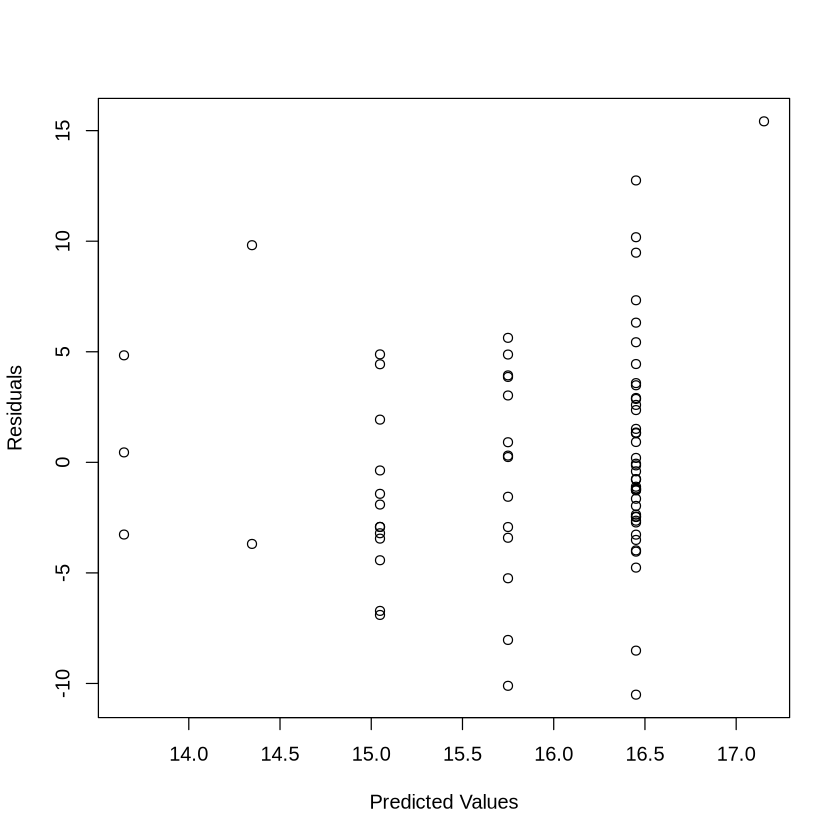

In [12]:
# Residual plot
# Calculate residuals for the selected model
residual_select <- tip_test$tip_per - pred_select

# Calculate residuals for the full model
residual_full <- tip_test$tip_per - pred_full

# Residual Plot for Selected Model
plot(pred_select, residual_select, 
     xlab = "Predicted Values", 
     ylab = "Residuals")

Figure 1. Residual Plot for Selected Model

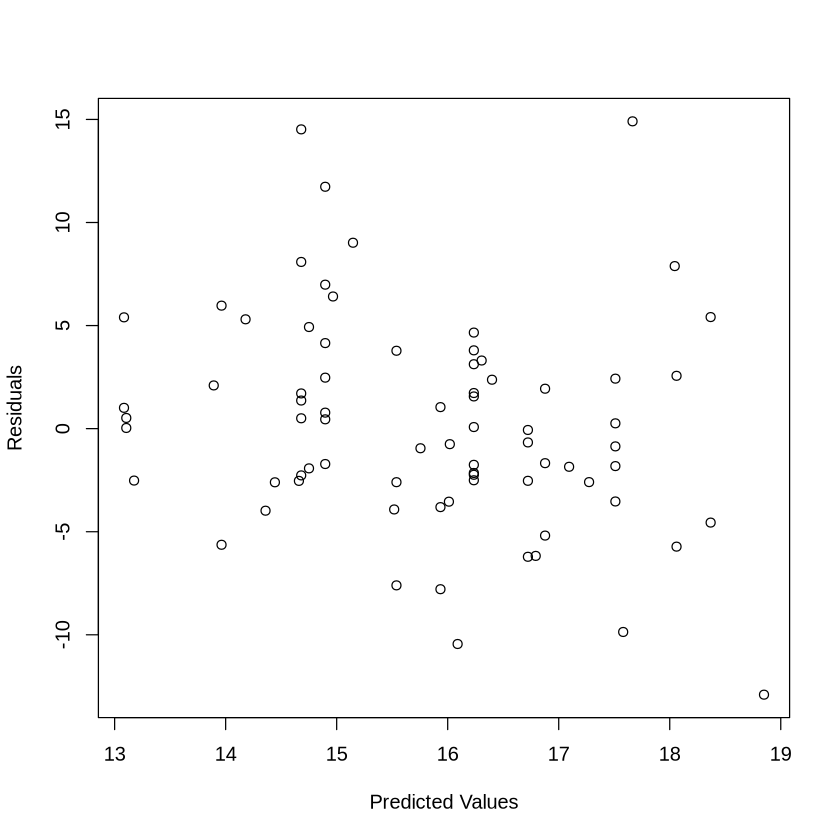

In [13]:
# Residual Plot for Full Model
plot(pred_full, residual_full, 
     xlab = "Predicted Values", 
     ylab = "Residuals")

Figure 2. Residual Plot for Full Model

**Interpretation of the plots**:

Selected Model: There's noticeable non-random pattern, which suggests heteroscedasticity (non-constant variance).

Full Model:The points look more randomly scattered, which is ideal.

The full model's residuals appear more random and evenly distributed, which is a key assumption in linear regression (residuals should be randomly scattered with constant variance and mean near zero). The selected model violates this by showing strong clustering and signs of heteroscedasticity. The results for the RMSE and R² suggest the selected model is better for prediction accuracy while the full model might be more appropriate in terms of following the key assumptions with linear regression.

Despite the selected model having slightly better prediction performance as seen in the lower RMSE and higher R^2, the violation of the key assumpitons (heteroscedasticity) make it less preferable. With the selected model following these assumptions it makes it more appropriate for statistical inference. Ultimately, this is a decision between prediction accuracy vs interpretability but considering this is a key assumption in linear regression and the performance differences are small, the full model is preferable for more reliable and intrepretable results.

### Computational Code (Poisson Regression)

In [14]:
# Main developer: Rafa 
# Poisson Model Training
# Use the existing training data
suppressWarnings({
glm_model_tip_train <- glm(tip_per ~ ., 
                           data = tip_train, 
                           family = poisson)
})

# Summary of the Poisson model
suppressWarnings({
summary(glm_model_tip_train)
})


Call:
glm(formula = tip_per ~ ., family = poisson, data = tip_train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.90371    0.09664  30.047   <2e-16 ***
sexMale     -0.08330    0.04079  -2.042   0.0411 *  
smokerYes    0.05307    0.04187   1.267   0.2050    
daySat      -0.03087    0.08036  -0.384   0.7009    
daySun       0.14376    0.08266   1.739   0.0820 .  
dayThur     -0.05807    0.11018  -0.527   0.5981    
timeLunch    0.04071    0.11738   0.347   0.7287    
size        -0.05097    0.02385  -2.137   0.0326 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 363.77  on 167  degrees of freedom
Residual deviance: 340.40  on 160  degrees of freedom
AIC: Inf

Number of Fisher Scoring iterations: 4


In [15]:
# Main developer: Rafa 

# Check for multicollinearity in the Poisson model
vif(glm_model_tip_train)

# Check for overdispersion
overdispersion_test <- sum(residuals(glm_model_tip_train, type = "pearson")^2) / 
  df.residual(glm_model_tip_train)

print(paste("Overdispersion statistic:", round(overdispersion_test, 2)))

,GVIF,Df,GVIF^(1/(2*Df))
sex,1.032495,1,1.016118
smoker,1.148163,1,1.071524
day,7.578580,3,1.401516
time,6.520353,1,2.553498
size,1.090100,1,1.044079


[1] "Overdispersion statistic: 2.45"


In [16]:
# Main developer: Rafa 
# Predictions using the trained Poisson model on the testing set
predictions <- predict(glm_model_tip_train, 
                       newdata = tip_test, 
                       type = "response")

# Residual deviance on the testing set
residual_deviance <- deviance(glm_model_tip_train)

# Null deviance for comparison (intercept-only model)
null_deviance <- deviance(glm_model_tip_train, type = "null")

In [17]:
# Deviance ratio (lower is better)
deviance_ratio <- residual_deviance / null_deviance
deviance_ratio

[1] 1

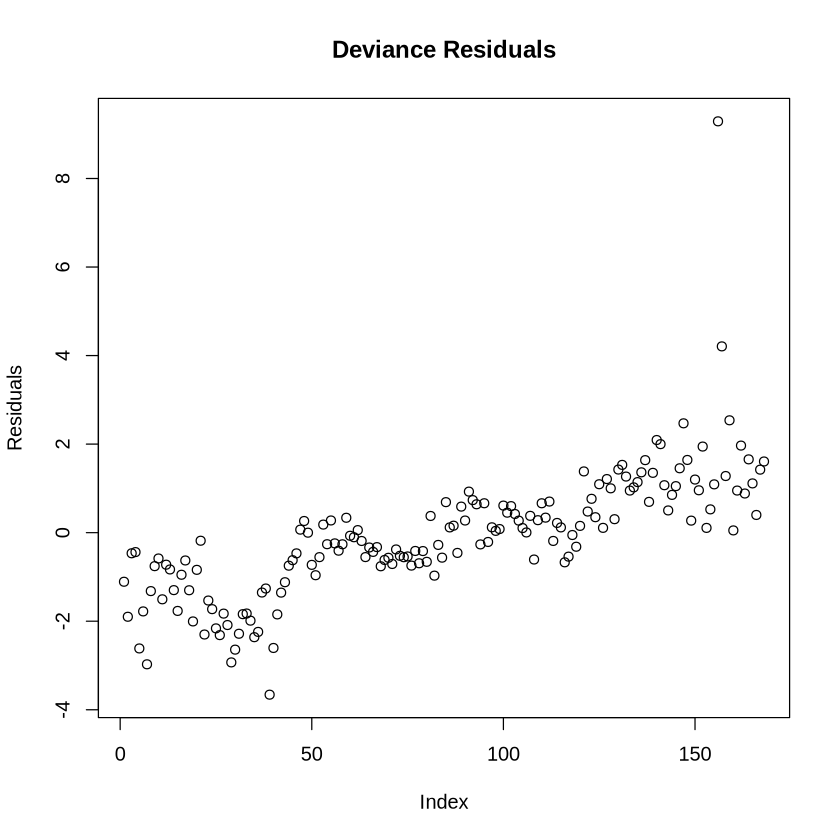

In [18]:
# Deviance residuals
deviance_residuals <- residuals(glm_model_tip_train, type = "deviance")
plot(deviance_residuals, main = "Deviance Residuals", ylab = "Residuals", xlab = "Index")

Figure 3. Residual Plot for Poisson Model

# Rough findings REVISED
This model appears to violate key assumptions of Poisson regression, such as overdispersion (with a statistic of 2.45), a deviance ratio of 1, and patterned residuals. The use of several predictors fails to improve the model’s fit. This suggests that the model, in its current form, is not reliable for inference and would benefit from refinement or the use of a different modeling approach.

(!) so we pick full model (mlr)?

### (3) Discussion (!)
In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.
- Summarize what you found and the implications/impact of your findings
- If relevant, discuss whether your results were what you expected to find
- Discuss how your model could be improved


- Discuss future questions/research this study could lead to

This study opens the door to several potential avenues for future research. One major limitation of the current analysis is the lack of variables related to service quality, customer income level, or restaurant type, all of which could meaningfully influence tipping behavior. Future studies could investigate how interpersonal dynamics, such as server friendliness or attentiveness, interact with customer demographics to affect tipping. Additionally, incorporating longitudinal or transactional data could help explore temporal patterns in tipping, such as whether tipping behavior changes over time or during holidays. Expanding this analysis to a larger, more diverse sample across different cities or restaurant chains could also provide insight into how regional or cultural factors shape tipping norms. Finally, if experimental or quasi-experimental data were available, future work could attempt to move beyond inference toward causal analysis, exploring whether targeted interventions (e.g., menu messaging or suggested tips) actually influence customer tipping decisions.

### (4) References (!)

Badole, S. (2021). Restaurant Tips Dataset. Kaggle. https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset/data

Haugom, E., & Thrane, C. (2022). The Effects of Party Size and Dining Time on Restaurant Patrons’ Tipping Behavior: Results from a Large-Scale Transaction Database. Retrieved from https://papers.ssrn.com/sol3/Delivery.cfm/SSRN_ID4101280_code5225184.pdf?abstractid=4101280&mirid=1

Jewell, C. N. (2008). Factors Influencing Tipping Behavior in a Restaurant. Psi Chi Journal of Undergraduate Research, 13(1), 38–48. Retrieved from https://cdn.ymaws.com/www.psichi.org/resource/resmgr/journal_2008/Spring08JNJewell.pdf